In [ ]:
# 1D 2D 3D tensors

In [ ]:
# scalar - single number
# 1d array - vector
# 2d array matrix
# 3d tensor - tensor

In [1]:
import torch
import numpy as np

In [3]:
torch.__version__

'2.2.2'

## Converting NumPy arrays to PyTorch tensors


In [6]:
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
print(type(arr))

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>


In [8]:
x = torch.from_numpy(arr)
# Equivalent to x = torch.as_tensor(arr)

print(x)

tensor([1, 2, 3, 4, 5])


In [10]:
# Print the type of data held by the tensor
print(x.dtype)

torch.int64


In [12]:
arr2 = np.arange(0.,12.).reshape(4,3)
print(arr2)

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]


In [14]:
x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


In [18]:
x = torch.empty(4, 3)
print(x)

tensor([[ 0.0000e+00, -8.5899e+09,  6.4936e+01],
        [-1.0845e-19,  2.5126e-37,  1.9034e-34],
        [ 1.5588e-41,  6.8611e-34,  2.5130e-37],
        [ 1.4013e-45,  1.0620e-32,  1.4013e-45]])


In [20]:
x = torch.zeros(4, 3, dtype=torch.int64)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [22]:
x = torch.arange(0,18,2).reshape(3,3)
print(x)

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])


In [24]:
x = torch.linspace(0,18,12).reshape(3,4)
print(x)

tensor([[ 0.0000,  1.6364,  3.2727,  4.9091],
        [ 6.5455,  8.1818,  9.8182, 11.4545],
        [13.0909, 14.7273, 16.3636, 18.0000]])


In [26]:
x = torch.tensor([1, 2, 3, 4])
print(x)
print(x.dtype)
print(x.type())

tensor([1, 2, 3, 4])
torch.int64
torch.LongTensor


In [28]:
x = torch.FloatTensor([5,6,7])
print(x)
print(x.dtype)
print(x.type())

tensor([5., 6., 7.])
torch.float32
torch.FloatTensor


# Linear Regression with PyTorch


In [30]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
X = torch.linspace(1,50,50).reshape(-1,1)

# Equivalent to
# X = torch.unsqueeze(torch.linspace(1,50,50), dim=1)

In [35]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())

tensor(0.)


In [37]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


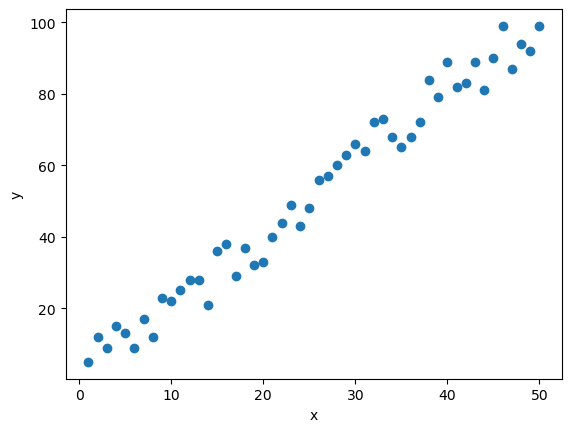

In [39]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

In [41]:
torch.manual_seed(59)

# number of feature in, number of feature out 
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


# Model classes


In [46]:
# inherit from nn.Module
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

<div class="alert alert-info"><strong>NOTE:</strong> The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers. Going forward our models may contain linear layers, convolutional layers, and more.</div>

In [49]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [51]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [53]:
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


which is confirmed with $f(x) = (0.1060)(2.0)+(0.9638) = 1.1758$

In [58]:
x1 = np.array([X.min(),X.max()])
print(x1)

[ 1. 50.]


In [62]:
# base on the current random weight and biases, how the model looks like
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: 0.10597813, Initial bias: 0.96379614

[1.0697743 6.2627025]


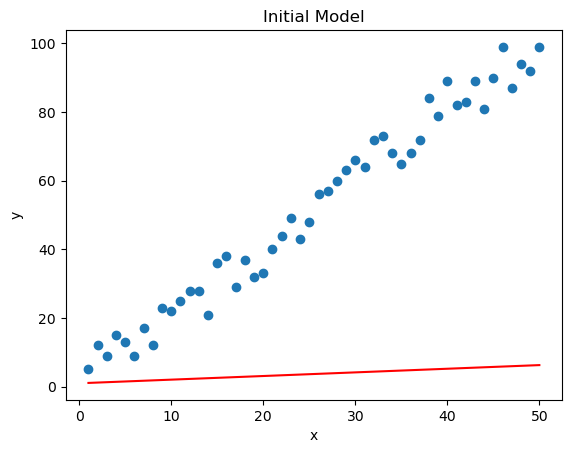

In [64]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

## Set the loss function


In [67]:
criterion = nn.MSELoss()

In [69]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

# You'll sometimes see this as
# optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [75]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    # predict on the forward pass 
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    # reset gradient
    optimizer.zero_grad()
    loss.backward()
    # update hyperparameters
    optimizer.step()

epoch:  1  loss: 21.05800056  weight: 1.98381913  bias: 1.05575156
epoch:  2  loss: 21.05748940  weight: 1.98379850  bias: 1.05646527
epoch:  3  loss: 21.05697823  weight: 1.98377669  bias: 1.05717862
epoch:  4  loss: 21.05646896  weight: 1.98375595  bias: 1.05789161
epoch:  5  loss: 21.05595970  weight: 1.98373449  bias: 1.05860424
epoch:  6  loss: 21.05545807  weight: 1.98371363  bias: 1.05931652
epoch:  7  loss: 21.05495071  weight: 1.98369217  bias: 1.06002843
epoch:  8  loss: 21.05444336  weight: 1.98367131  bias: 1.06074011
epoch:  9  loss: 21.05393600  weight: 1.98364997  bias: 1.06145144
epoch: 10  loss: 21.05343437  weight: 1.98362887  bias: 1.06216240
epoch: 11  loss: 21.05292511  weight: 1.98360777  bias: 1.06287301
epoch: 12  loss: 21.05242157  weight: 1.98358667  bias: 1.06358325
epoch: 13  loss: 21.05191803  weight: 1.98356557  bias: 1.06429315
epoch: 14  loss: 21.05141449  weight: 1.98354459  bias: 1.06500268
epoch: 15  loss: 21.05091095  weight: 1.98352337  bias: 1.0657

In [79]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98277164, Current bias: 1.09101629

[ 1. 50.]
[  3.073788 100.2296  ]


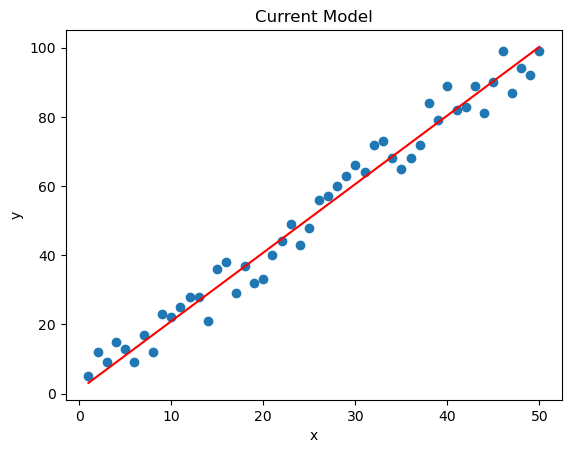

In [81]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');